<a href="https://colab.research.google.com/github/StephenMa1511/PortfolioOptimization/blob/main/WQU_PORFOLIO_MANAGEMENT_GWP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

On this project, we will focuses on optimizing stock portfolios using a four-year dataset from 2020  to 2024 of five major U.S. companies: Apple Inc. (AAPL), Johnson & Johnson (JNJ), JPMorgan Chase & Co. (JPM), The Coca-Cola Company (KO), and Exxon Mobil Corporation (XOM). These companies are selected to represent key sectors of the Dow Jones Industrial Average (DJIA): Technology, Healthcare, Financials, Consumer Goods, and Energy, respectively. The optimization problem, excluding short selling, is approached through the following steps

1. Data Processing: The data is splited into a three-year training period and a one-year testing period.

2. Classical Markowitz Optimization: We apply classical Markowitz optimization and equal weights allocation during the training period to identify the minimum variance portfolio and the portfolio with the best Sharpe ratio in training period.

3. Black Litterman model application:  We conduct an analysis of recent news, headlines, and analyst reports of the stocks in the traning periods to generate our view for returns and volatilities of the stocks and feed them into the ,  the Black-Litterman framework. The investable universe that we used in this process is the Dow Jones Index.

4. Finally, we will compare the Black-Litterman optimized portfolio to the classical portfolios allocation along with the baseline portfolio which is the equal weight portfolio. Hopefully the result could give us insights into portfolio allocation strategies and their practical applications for investment decisions.

# Step 1. Data Preprocessing


We will use yfinance package to retrive the time series of daily prices from yahoo finance

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import yfinance as yf
import pandas_datareader as web
from datetime import datetime as dt, timedelta as td
import numpy as np

style.use("default")

params = {
    "axes.labelsize": 8, "font.size": 8, "legend.fontsize": 8,
    "xtick.labelsize": 8, "ytick.labelsize": 8, "text.usetex": False,
    "font.family": "sans-serif", "axes.spines.top": False, "axes.spines.right": False,
    "grid.color": "grey", "axes.grid": True,  "grid.alpha": 0.5, "grid.linestyle": ":",
}

plt.rcParams.update(params)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
tickers = ['AAPL', 'JNJ', 'JPM', 'KO', 'XOM', '^DJI']
df =  yf.download(tickers, start="2020-05-01", end="2024-05-01")['Adj Close']
df.columns = ['AAPL', 'JNJ', 'JPM', 'KO', 'XOM', 'DJI']
df

[*********************100%%**********************]  6 of 6 completed


,AAPL,JNJ,JPM,KO,XOM,DJI
Date,,,,,,
2020-05-01,70.387001,133.009659,83.024551,40.276455,35.179722,23723.689453
2020-05-04,71.382889,132.991699,82.036285,39.870155,36.598667,23749.759766
2020-05-05,72.454254,134.095016,81.911629,40.099808,36.557888,23883.089844
2020-05-06,73.201797,132.821274,80.371346,39.525692,35.872890,23664.640625
2020-05-07,73.959061,132.381760,81.208275,39.393200,36.076756,23875.890625
...,...,...,...,...,...,...
2024-04-24,168.791061,148.529999,193.080002,61.549999,121.050003,38460.921875
2024-04-25,169.659882,146.820007,193.369995,61.740002,121.330002,38085.800781
2024-04-26,169.070679,146.139999,193.490005,61.740002,117.959999,38239.660156


In [ ]:
display(df)

,AAPL,JNJ,JPM,KO,XOM,DJI
Date,,,,,,
2020-05-01,70.387001,133.009659,83.024551,40.276455,35.179722,23723.689453
2020-05-04,71.382889,132.991699,82.036285,39.870155,36.598667,23749.759766
2020-05-05,72.454254,134.095016,81.911629,40.099808,36.557888,23883.089844
2020-05-06,73.201797,132.821274,80.371346,39.525692,35.872890,23664.640625
2020-05-07,73.959061,132.381760,81.208275,39.393200,36.076756,23875.890625
...,...,...,...,...,...,...
2024-04-24,168.791061,148.529999,193.080002,61.549999,121.050003,38460.921875
2024-04-25,169.659882,146.820007,193.369995,61.740002,121.330002,38085.800781
2024-04-26,169.070679,146.139999,193.490005,61.740002,117.959999,38239.660156


In [ ]:
ret_df = df.pct_change().dropna()
stocks_df = ret_df[['AAPL', 'JNJ', 'JPM', 'KO', 'XOM']]
mkt_df = ret_df['DJI']

In [ ]:
stocks_df

,AAPL,JNJ,JPM,KO,XOM
Date,,,,,
2020-05-04,0.014149,-0.000135,-0.011903,-0.010088,0.040334
2020-05-05,0.015009,0.008296,-0.001520,0.005760,-0.001114
2020-05-06,0.010317,-0.009499,-0.018804,-0.014317,-0.018737
2020-05-07,0.010345,-0.003309,0.010413,-0.003352,0.005683
2020-05-08,0.023802,0.007521,0.016336,0.033857,0.043852
...,...,...,...,...,...
2024-04-24,0.012702,-0.006887,0.004892,0.015007,0.000165
2024-04-25,0.005147,-0.011513,0.001502,0.003087,0.002313
2024-04-26,-0.003473,-0.004632,0.000621,0.000000,-0.027776


In [ ]:
mkt_df

Date
2020-05-04    0.001099
2020-05-05    0.005614
2020-05-06   -0.009147
2020-05-07    0.008927
2020-05-08    0.019075
                ...   
2024-04-24   -0.001111
2024-04-25   -0.009753
2024-04-26    0.004040
2024-04-29    0.003829
2024-04-30   -0.014854
Name: ^DJI, Length: 1005, dtype: float64

We then split data into 3 year optimizing and 1 year forward testing


In [ ]:
test_ratio = 1/4
test_split = int(len(stocks_df) * test_ratio)
train_split = len(stocks_df) - test_split

stocks_train = stocks_df.iloc[:-test_split]
stocks_test = stocks_df.iloc[train_split:]

mkt_train = mkt_df.iloc[:-test_split]
mkt_test = mkt_df.iloc[train_split:]

In [ ]:
stocks_train

Ticker,AAPL,JNJ,JPM,KO,XOM
Date,,,,,
2020-05-04,0.014149,-0.000135,-0.011903,-0.010088,0.040334
2020-05-05,0.015009,0.008296,-0.001520,0.005760,-0.001114
2020-05-06,0.010317,-0.009499,-0.018804,-0.014317,-0.018737
2020-05-07,0.010345,-0.003309,0.010413,-0.003352,0.005683
2020-05-08,0.023802,0.007521,0.016336,0.033857,0.043852
...,...,...,...,...,...
2023-04-25,-0.009436,0.009164,-0.021744,-0.001564,-0.014213
2023-04-26,-0.000061,-0.015498,-0.017724,-0.004699,-0.009183
2023-04-27,0.028395,0.002337,0.013459,0.002046,0.011953


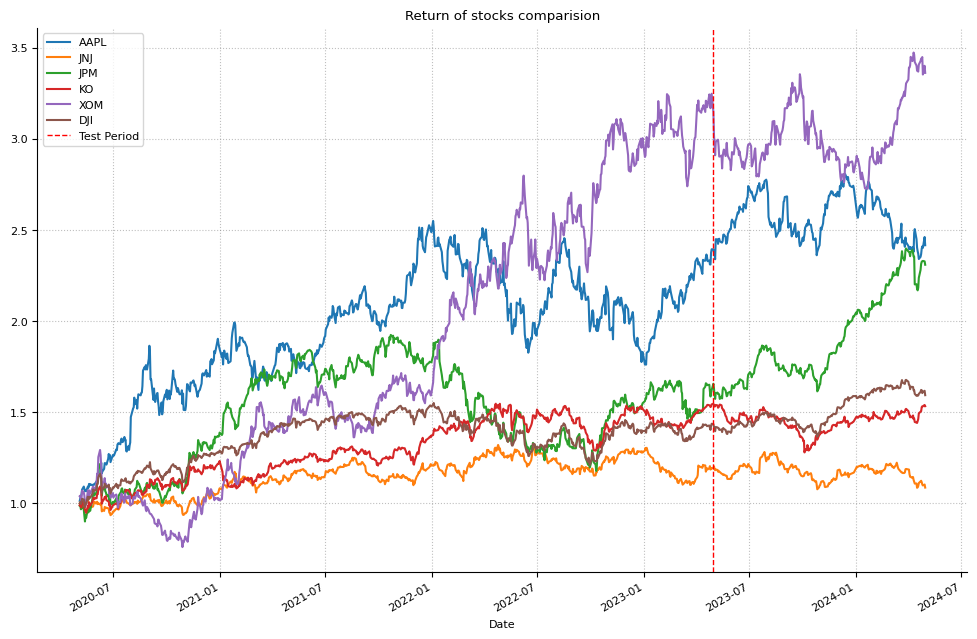

In [ ]:
import matplotlib.pyplot as plt
(1+ ret_df).cumprod().plot(figsize = (12,8))
plt.axvline(dt(2023, 5, 1), color='r', linestyle='--', linewidth=1, label = 'Test Period')
plt.title('Return of stocks comparision', fontsize = 15)
plt.legend()
plt.show()


Based on the return graph above, it is evident that both AAPL and XOM exhibit superior performance throughout the training periods. Conversely, the performance of JPM, KO, and JNJ closely mirrors that of the Dow Jones index. However, notably, during the testing period, JPM has ascended to join AAPL and JNJ as one of the top performers.








Text(0.5, 1.05, 'Pairs plot of stock in the portfolio')

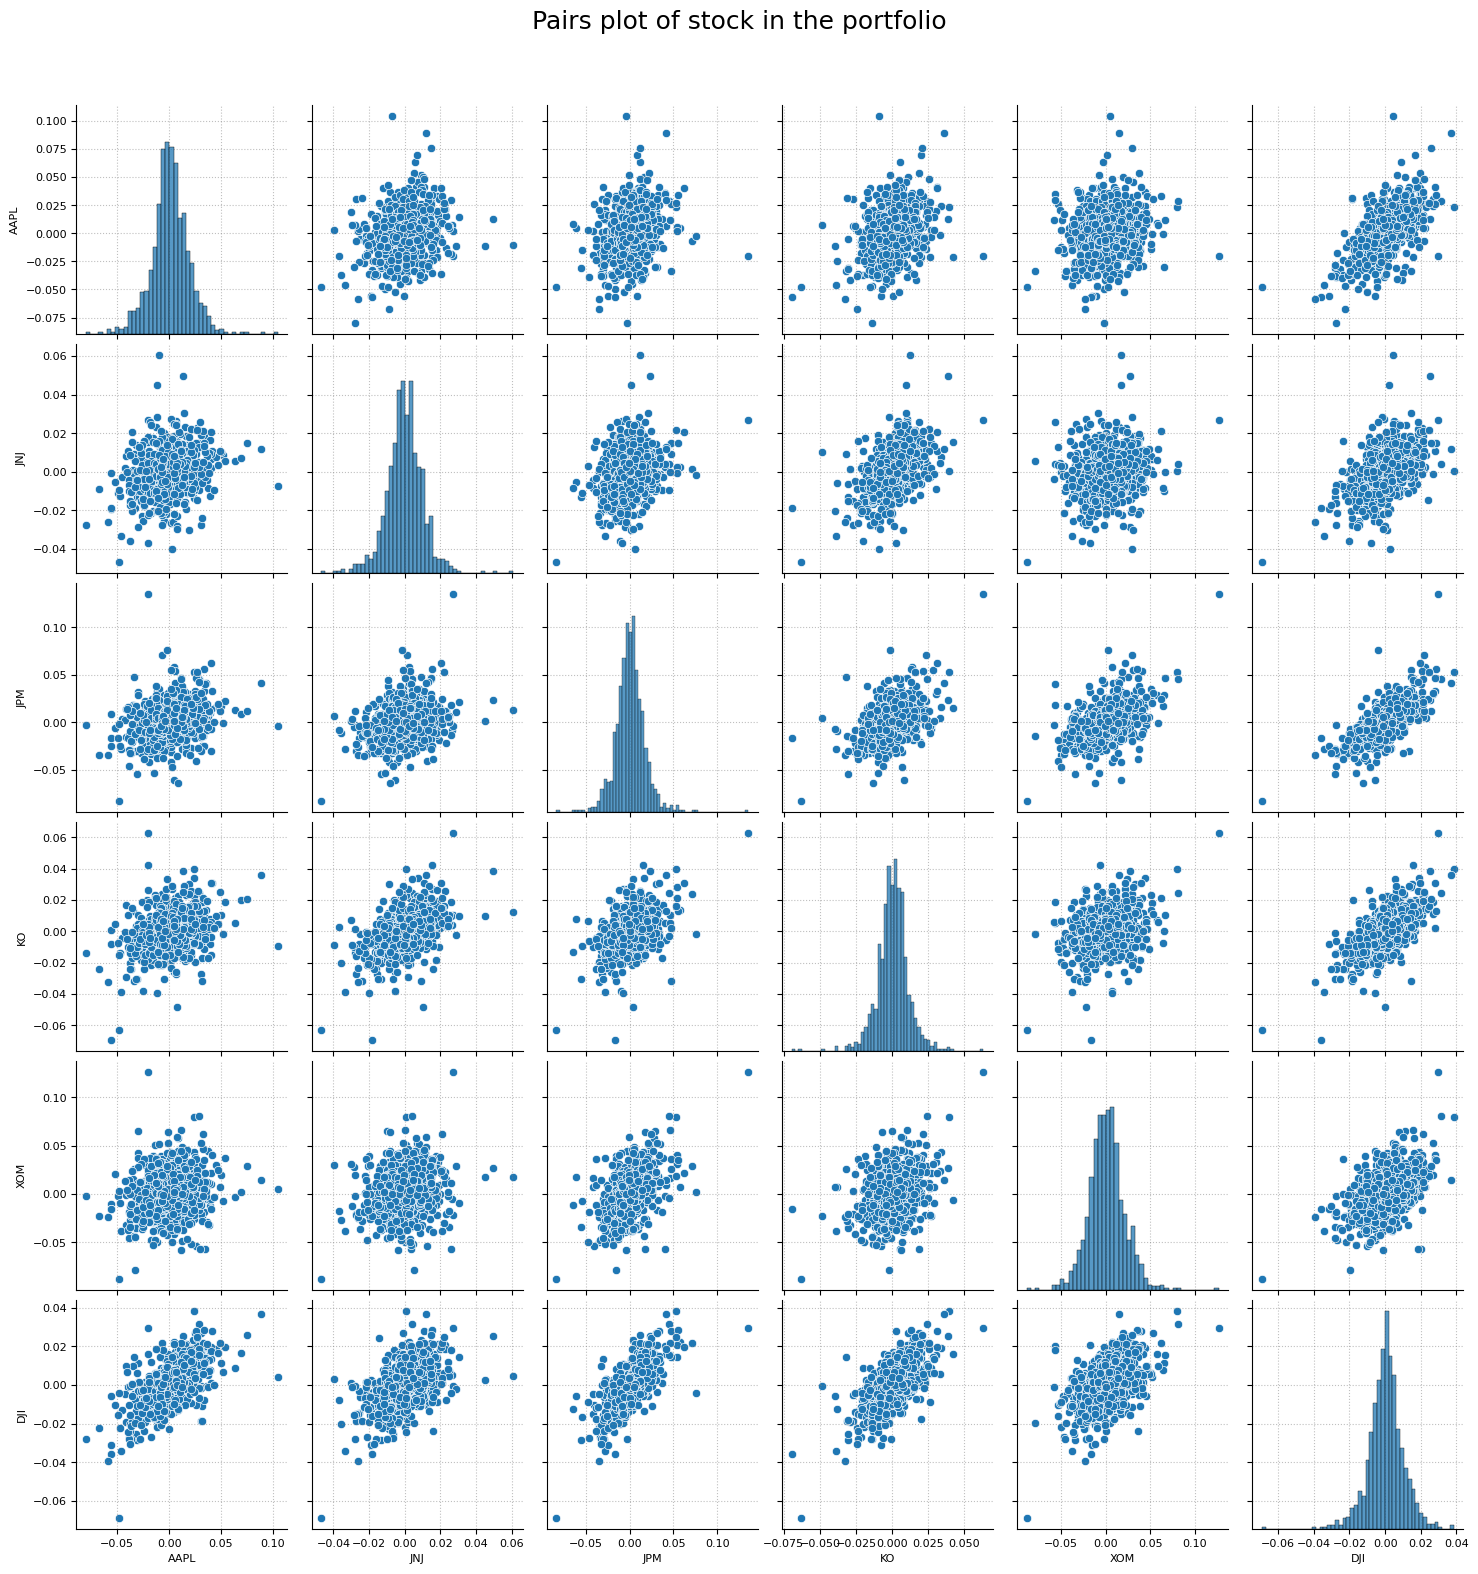

In [ ]:
sns.pairplot(ret_df)
plt.suptitle('Pairwise plot of stocks in the portfolio', y = 1.02, fontsize = 18)

Text(0.5, 1.0, 'Correlation matrix')

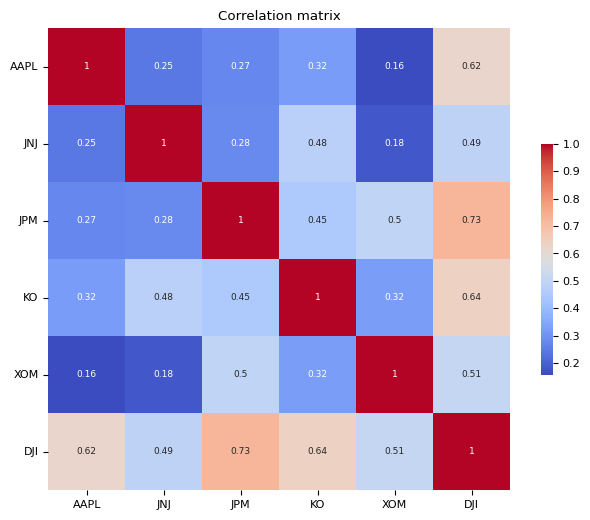

In [ ]:
corr = ret_df.corr()
plt.figure(figsize = (8,6))
plt.grid()
# mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# ax = sns.heatmap(corr_matrix, mask = mask, robust = True, cmap = 'coolwarm', square=True,
#     annot=True, annot_kws={'size': 6.5}, cbar_kws={'shrink': 0.5})
ax = sns.heatmap(corr, robust = True, cmap = 'coolwarm', square=True,
    annot=True, annot_kws={'size': 6.5}, cbar_kws={'shrink': 0.5})

plt.yticks(rotation=0, ha='right')
plt.title('Correlation matrix')



The graphical representation and heatmap above reveal that the pairwise correlations among our five stocks are generally weak, with most correlations falling below 0.5. However, the correlations between individual stocks and the DJI index are notably high, surpassing 0.5 in all instances. Moreover, during periods of extreme returns, particularly negative ones, the correlations between the stocks exhibit an increase, as indicated by the pair plot.

# Step 2: Classical Portfolio Optimization

In this step, we will use Markowitz's analytical formulas as well as numerical method like CVXOPT and scipy.optimize to solve the optimization problem. The data in the train set will be used to optimize porfolios and the resulting weights will be applied to the test set in Step 4

The risk free rate used in this GWP is the US 1 Year Goverment Bond Yield at the end of the training period, which is 4.76%.

Firstable, we'll use classical Markowitz's formula to find the tangency portfolio and global minimum variance portfolio, and compute their expected return, volatilty and sharpe ratio in the trainning period

In [ ]:
# Markowit porfolio optimization
#Calculate tangency weights
sigma = stocks_train.cov()*252
rf = 0.046 # risk free rate for the testing period, it is the US01 yield at the the end of the train set time
r = stocks_train.mean() * 252 - rf
e = np.ones(len(r))
sigma_inv = np.linalg.inv(sigma)
v = (sigma_inv @ r)/ (r.T @ sigma_inv @ r)
w_tang = v / (v.T @ e) # optimal weights for tangency portfolio

In [ ]:
print('Optimal weights:')
for i in range(len(stocks_train.columns)) :
    print(stocks_train.columns[i], ': ', round(w_tang[i],2))

tangen_returns =  stocks_train @ w_tang.T
tangen_volatility = np.std(tangen_returns) * 252 **0.5
tangen_sharpe = (tangen_returns.mean()*252 - rf)/tangen_volatility

print('Tangency Portfolio Anualized return: ', round(tangen_returns.mean()*252,2))
print('Tangency Portfolio Anualized Volatility: ', round(tangen_volatility,2))
print('Tangency Portfolio Sharpe ratio: ', round(tangen_sharpe,2))

Optimal weights:
AAPL :  0.62
JNJ :  -0.48
JPM :  -0.21
KO :  0.32
XOM :  0.75
Tangency Portfolio Anualized return:  0.52
Tangency Portfolio Anualized Volatility:  0.34
Tangency Portfolio Sharpe ratio:  1.41


In [ ]:
#Global Minimum portfolio
w_gbm = (sigma_inv @ e)/(e.T @ sigma_inv @ e)

print('Global minimum variance weights:')
for i in range(len(stocks_train.columns)) :
    print(stocks_train.columns[i], ': ', round(w_gbm[i],2))

gbm_returns =  stocks_train @ w_gbm.T
gbm_volatility = np.std(gbm_returns) * 252 **0.5
gbm_sharpe = (gbm_returns.mean()*252 - rf)/gbm_volatility

print('Tangency Portfolio Anualized return: ', round(gbm_returns.mean()*252,2))
print('Tangency Portfolio Anualized Volatility: ', round(gbm_volatility,2))
print('Tangency Portfolio Sharpe ratio: ', round(gbm_sharpe,2))


Global minimum variance weights:
AAPL :  0.06
JNJ :  0.58
JPM :  0.02
KO :  0.28
XOM :  0.06
Tangency Portfolio Anualized return:  0.14
Tangency Portfolio Anualized Volatility:  0.15
Tangency Portfolio Sharpe ratio:  0.62


In [ ]:
w_eq = np.array([0.2,0.2,0.2,0.2,0.2])
eqW_returns = stocks_train @ w_eq.T
eqW_volatility = np.std(eqW_returns) * 252 **0.5
eqW_sharpe = (eqW_returns.mean()*252 - rf)/eqW_volatility

print('Equal weights Portfolio Anualized return: ', round(eqW_returns.mean()*252,2))
print('Equal weights Portfolio Anualized Volatility: ', round(eqW_volatility,2))
print('Equal weights Portfolio Sharpe ratio: ', round(eqW_sharpe,2))

Equal weights Portfolio Anualized return:  0.25
Equal weights Portfolio Anualized Volatility:  0.18
Equal weights Portfolio Sharpe ratio:  1.11


We can see from the results above that tangency portfolio include short selling. So to meet the demand of a only long portfolio, we have to resort to numerical solution like scipy.optimize package to solve the problem.

Our optimal portfolio in this case will be a portfolio with max sharpe ratio and no short selling position

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Set up the problem parameters
n_assets = len(stocks_train.columns)
mean_returns = stocks_train.mean() *252
cov_matrix = stocks_train.cov() *252

# Define the objective function for the optimization problem
def objective(w):
    return -((mean_returns.values @ w) - rf) / (np.sqrt(w.T @ cov_matrix.values @ w))

# Define the constraint for the optimization problem
def constraint(w):
    return 1 - np.sum(w)

# Solve the optimization problem to find the minimum variance portfolio
bounds = [(0, 1) for _ in range(n_assets)]
initial_guess = np.ones(n_assets) / n_assets
result = minimize(objective, initial_guess, constraints={'type': 'eq', 'fun': constraint}, bounds=bounds)

# Extract the optimal portfolio weights
optimal_weights = result.x

print('Optimal weights:')
for i in range(len(stocks_train.columns)) :
    print(stocks_train.columns[i], ': ', round(optimal_weights[i],2))

optP_returns =  stocks_train @ optimal_weights.T
optP_volatility = np.std(optP_returns) * 252 **0.5
sharpe = (optP_returns.mean()*252 - rf)/optP_volatility

print('Optimal Portfolio Anualized return: ', round(optP_returns.mean()*252,2))
print('Optimal Portfolio Anualized Volatility: ', round(optP_volatility,2))
print('Optimal Portfolio Sharpe ratio: ', round(sharpe,2))

Optimal weights:
AAPL :  0.45
JNJ :  0.0
JPM :  0.0
KO :  0.02
XOM :  0.54
Optimal Portfolio Anualized return:  0.39
Optimal Portfolio Anualized Volatility:  0.26
Optimal Portfolio Sharpe ratio:  1.36


Our new optimal portfolio is generated with  54% weight goes to XOM, 45% to AAPL and virtually none of JNJ, JPM, KO. The sharpe ratio accquired is 1.36, less than 3.5% compared to the tangency portfolio.

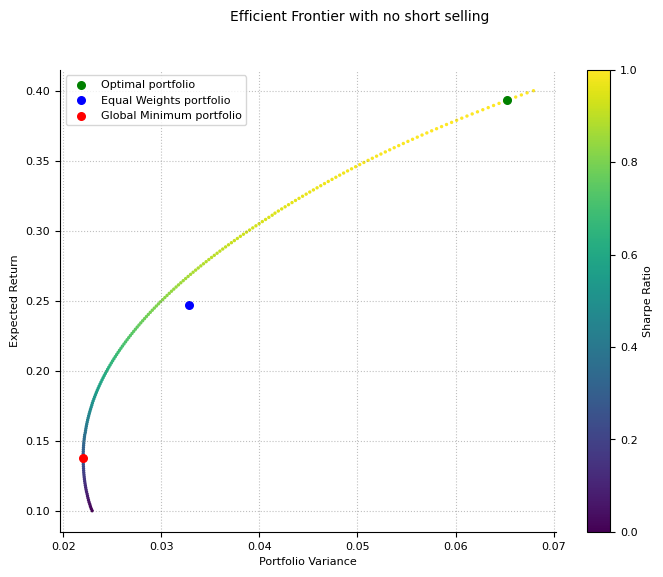

In [ ]:
# Define the objective function for the optimization problem
def objective(w):
    return -((mean_returns.values @ w) -0.5* w.T @ cov_matrix.values @ w)

# Calculate the efficient frontier
efficient_frontier = []
for r in np.linspace(0.1, 0.4, 200):
    # Define the constraint for the optimization problem
    def constraint1(w):
        return (mean_returns.values @ w) - r
    def constraint2(w):
        return 1 - np.sum(w)

    con1 = {'type': 'eq', 'fun': constraint1}
    con2 = {'type': 'eq', 'fun': constraint2}
    cons = ([con1,con2])

    # Solve the optimization problem to find the minimum variance portfolio
    result = minimize(objective, initial_guess, constraints=cons, bounds=bounds)

    # Extract the optimal portfolio weights
    optimal_weights = result.x

    # Calculate the portfolio variance
    portfolio_variance = optimal_weights.T @ cov_matrix.values @ optimal_weights
    # Calculate portfolio Sharpe ratio
    portfolio_sharpe = (r - rf)/np.sqrt(portfolio_variance)
    # Add the portfolio to the efficient frontier
    efficient_frontier.append((portfolio_variance, r, portfolio_sharpe))

# Plot the efficient frontier
plt.figure(figsize=(8, 6))

plt.scatter([p[0] for p in efficient_frontier], [p[1] for p in efficient_frontier], c = [p[2] for p in efficient_frontier],
            cmap = 'viridis', s = 2)
plt.scatter(optP_volatility**2, optP_returns.mean()*252, label = 'Optimal portfolio', color = 'g', s = 30)
plt.scatter(eqW_volatility**2, eqW_returns.mean()*252, label = 'Equal Weights portfolio', color = 'b', s = 30)
plt.scatter(gbm_volatility**2, gbm_returns.mean()*252, label = 'Global Minimum portfolio', color = 'r', s = 30)

plt.xlabel('Portfolio Variance')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.suptitle('Efficient Frontier with no short selling', fontsize = 10)
plt.legend()
# plt.title('Efficient Frontier')
plt.show()

# Step 3: Random Strategy Optimization

In [ ]:
stocks_df

Ticker,AAPL,JNJ,JPM,KO,XOM
Date,,,,,
2020-05-04,0.014149,-0.000135,-0.011903,-0.010088,0.040334
2020-05-05,0.015009,0.008295,-0.001519,0.005760,-0.001114
2020-05-06,0.010317,-0.009498,-0.018804,-0.014317,-0.018738
2020-05-07,0.010345,-0.003309,0.010413,-0.003352,0.005683
2020-05-08,0.023802,0.007521,0.016336,0.033857,0.043852
...,...,...,...,...,...
2024-04-24,0.012702,-0.006887,0.004892,0.015007,0.000165
2024-04-25,0.005147,-0.011513,0.001502,0.003087,0.002313
2024-04-26,-0.003473,-0.004632,0.000621,0.000000,-0.027776


Log Returns vs Arithmetic Returns

In [ ]:
log_ret = np.log(stocks_df/stocks_df.shift(1))
log_ret.head()


Ticker,AAPL,JNJ,JPM,KO,XOM
Date,,,,,
2020-05-04,NaN,NaN,NaN,NaN,NaN
2020-05-05,0.058975,NaN,-2.058490,NaN,NaN
2020-05-06,-0.374787,NaN,2.515750,NaN,2.822465
2020-05-07,0.002644,-1.054488,NaN,-1.451952,NaN
2020-05-08,0.833282,NaN,0.450277,NaN,2.043323


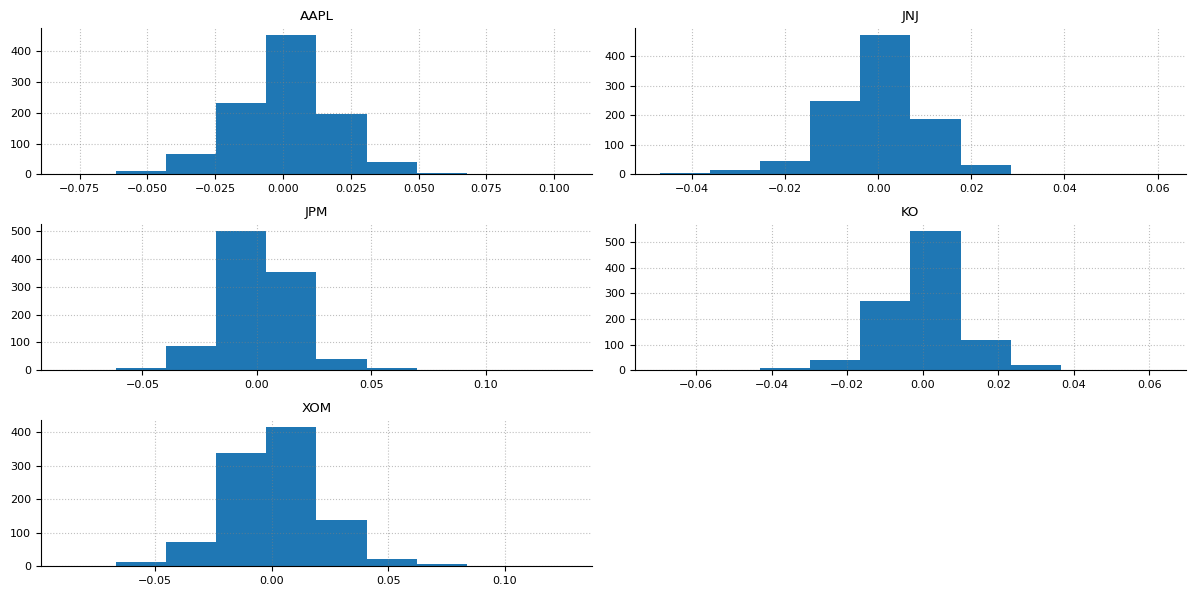

In [ ]:
stocks_df.hist(bins=10,figsize=(12,6));
plt.tight_layout()


In [ ]:
stocks_df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
AAPL,1005.0,0.001046,0.018361,-0.080061,-0.008503,0.000749,0.011989,0.104688
JNJ,1005.0,0.000135,0.010163,-0.046888,-0.005519,0.000061,0.005935,0.060728
JPM,1005.0,0.000975,0.016915,-0.083443,-0.008356,0.000764,0.009901,0.135392
KO,1005.0,0.000487,0.011033,-0.069626,-0.005196,0.000800,0.006372,0.063094
XOM,1005.0,0.001412,0.020268,-0.088253,-0.011115,0.001328,0.012657,0.126602


In [ ]:
stocks_df.mean() * 252


Ticker
AAPL    0.263713
JNJ     0.033931
JPM     0.245757
KO      0.122614
XOM     0.355714
dtype: float64

In [ ]:
stocks_df.cov()


Ticker,AAPL,JNJ,JPM,KO,XOM
Ticker,,,,,
AAPL,0.000337,0.000046,0.000085,0.000065,0.000059
JNJ,0.000046,0.000103,0.000048,0.000054,0.000037
JPM,0.000085,0.000048,0.000286,0.000084,0.000170
KO,0.000065,0.000054,0.000084,0.000122,0.000072
XOM,0.000059,0.000037,0.000170,0.000072,0.000411


In [ ]:
log_ret.cov()*252

Ticker,AAPL,JNJ,JPM,KO,XOM
Ticker,,,,,
AAPL,592.367653,-5.395134,83.387457,18.262660,17.823169
JNJ,-5.395134,612.403868,66.316759,75.237316,-0.468074
JPM,83.387457,66.316759,562.904366,89.232800,85.017075
KO,18.262660,75.237316,89.232800,586.024626,8.010640
XOM,17.823169,-0.468074,85.017075,8.010640,633.985356


Single run for random allocation

In [ ]:
# Set seed (optional)
np.random.seed(101)

# Stock Columns
print('Stocks')
print(stocks_df.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(5))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)


Stocks
Index(['AAPL', 'JNJ', 'JPM', 'KO', 'XOM'], dtype='object', name='Ticker')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166 0.68527698]


Rebalance to sum to 1.0
[0.26182041 0.28933544 0.01443678 0.08696357 0.3474438 ]


Expected Portfolio Return
0.07465409309396231


Expected Volatility
13.514833426576521


Sharpe Ratio
0.005523863353517716


Now run the above code multiple times

In [ ]:
num_ports = 1000

all_weights = np.zeros((num_ports,len(stocks_df.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(5))

    # Rebalance Weights
    weights = weights / np.sum(weights)

    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]


In [ ]:
sharpe_arr.max()


0.20096586214918044

In [ ]:
sharpe_arr.argmax()


954

In [ ]:
all_weights[999,:]


array([0.35046427, 0.04007925, 0.35484946, 0.18732948, 0.06727754])

In [ ]:
max_sr_ret = ret_arr[999]
max_sr_vol = vol_arr[999]


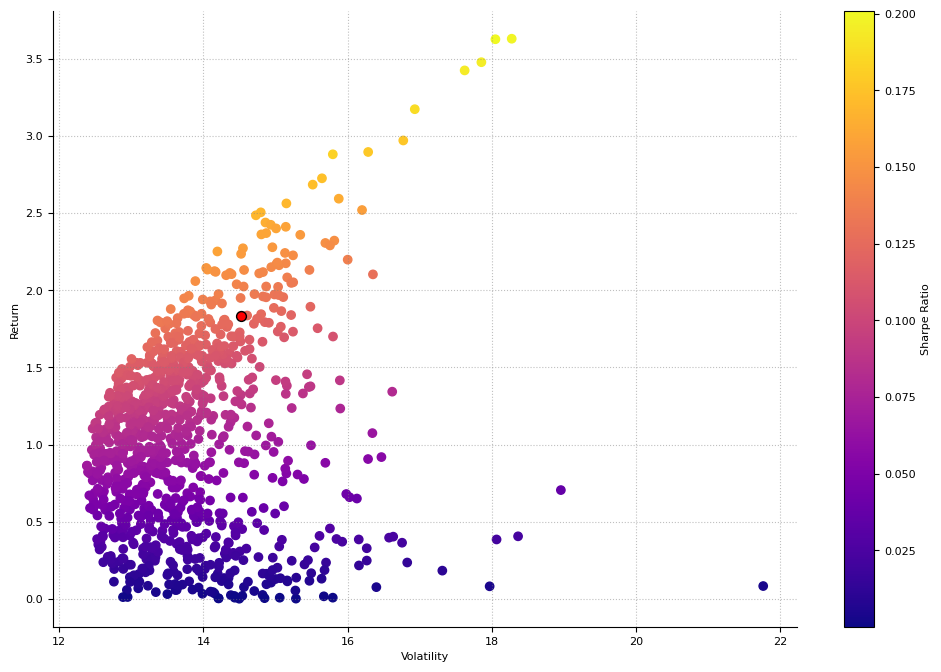

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')


#Step 4: Black Litterman

In [ ]:
# Step 1: Define views based on recent news, headlines, etc.
views = {
    'AAPL': -0.5,
    'XOM': 0.01,
    'JNJ': 0.01,
    'KO': -0.03,
    'JPM': 0.03
}

# Step 2: Calculate expected returns and covariance matrix
mu = stocks_df.mean() * 252  # annualize mean returns
S = stocks_df.cov() * 252  # annualize covariance matrix

# Step 3: Define other inputs
rf_rate = 0.01  # risk-free rate
tau = 0.05  # uncertainty scalar

# Step 4: Compute equilibrium excess returns (pi)
Pi = np.dot(S, mu)
omega = np.diag(np.diag(np.dot(np.dot(tau, S), np.transpose(tau))))

# Step 5: Compute the views-adjusted expected returns
P = np.array(list(views.values()))  # Pick matrix
Q = np.array(list(views.values())) + np.array(list(views.values()))  # View matrix
tauP = tau * np.eye(len(P))
tauP_transpose = np.transpose(tauP)

Omega = np.dot(np.dot(P, tauP), np.transpose(P)) + omega
Omega_inv = np.linalg.inv(Omega)

theta = np.dot(np.dot(np.dot(np.transpose(P), Omega_inv), Q), tau)

# Step 6: Combine the equilibrium returns with the views-adjusted returns
combined_returns = mu + np.dot(np.dot(S, np.transpose(P)), theta - Q)

# Step 7: Perform portfolio optimization with combined returns
# Weights calculation (assuming no short-selling)
inv_S = np.linalg.inv(S)
ones = np.ones(len(mu))
A = np.dot(np.dot(np.transpose(ones), inv_S), ones)
B = np.dot(np.dot(np.transpose(ones), inv_S), mu)
C = np.dot(np.dot(np.transpose(mu), inv_S), mu)

delta = A * C - B ** 2

w_bl = (1 / delta) * (np.dot(inv_S, (mu - rf_rate * ones)) + (B / A) * np.dot(inv_S, ones))

print("\nBlack-Litterman Portfolio Optimization Results:")
for i, asset in enumerate(['AAPL', 'JNJ', 'JPM', 'KO', 'XOM']):
    print(f"{asset}: {w_bl[i]*100:.2f}%")


Black-Litterman Portfolio Optimization Results:
AAPL: 4.11%
JNJ: 1.05%
JPM: 1.87%
KO: 4.06%
XOM: 4.27%


In [ ]:
# Given annualized mean returns and covariance matrix
returns_mean_annualized = mu
covariance_matrix_annualized = S
portfolio_weights = w_bl  # Assuming weights calculated previously

# Step 8: Calculate Annual Return for the Portfolio
portfolio_annual_return = np.dot(portfolio_weights, returns_mean_annualized)
print("\nPortfolio Annual Return:")
print(f"{portfolio_annual_return*100:.2f}%")

# Step 9: Calculate Annual Volatility (Standard Deviation) for the Portfolio
portfolio_volatility_annual = np.sqrt(np.dot(portfolio_weights.T, np.dot(covariance_matrix_annualized, portfolio_weights)))
print("\nPortfolio Annual Volatility (Standard Deviation):")
print(f"{portfolio_volatility_annual*100:.2f}%")


Portfolio Annual Return:
3.59%

Portfolio Annual Volatility (Standard Deviation):
2.74%


**Comparison**

### Portfolio Allocation Table Orginal vs. BL:

|   Assets | Original |   BL    |
|  ------- | -------- |  -----  |
| XOM      | 1\%      | 4.27\%  |
| JNJ      | 1\%      | 1.05\%  |
| KO       | 3\%      | 4.06\%  |
| JPM      | 3\%      | 1.87\%  |
| AAPL     | 5\%     | 4.11\%  |



**The Black-Litterman Allocation Method**

Bayesian method is the brain behind Black Litterman approach. This approach combines the returns for the securities with views of the investor to predict the returns that the investor might receive.

The advantages of Black litterman is
Views can be applied to particular securities
A person can provide the confidence that he has on the views
The returns generated from the model are quite flexible than the mean returns

The expression is:

E(R) = [)-1 + PT-1P]-1[()-1 + + Pt-1Q]

Where

E(R) is a nx1 matrix of the returns, where N = total securitiesw
 is a constant.
 is the nxn cov
is the kxk  conf
P is the kxn relates views to the securities
 s the Nx1 matrix of original predicted returns
Q is a Kx1 matrix of views.

Original(Prior)

Black and Litterman (1991)[3] suggest all investors use the estimate given by the markets.
The risk is the difference between the market return and the actual return divided by its variance. The expression is given below
 = R - Rf2

We can compute the market return by
 = wmarket
Where wmarket  is the weights.


Views

The views can be of two types - absolute and relative. In absolute the investor would say that a particular security would return x% whereas in relative the investor compare the two securities and conclude on the percentage of the return with respect to other

Using these views we create the matrix P.

Confidence Level
The investor would assign a confidence level to each of the views and we compute the confidence matrix, . It is computed using the original matrix using the below expression :
 =  * PPT
In software it is computed using Idzorek's method [1], where in the each value in the matriz is a percentage

Output
The model gives us the expected returns and cov matrix which are inputs to the optimization algorithm and the final output are weights of each of the securities for allocation of the budget.
w = ()-1E(R)



In [ ]:
# Step 1: Define views based on recent news, headlines, etc.
#randomview
# AAPL > ret of the rest
# JNJ ret = 0.05
# JPM ret = 0.02
# KO ret > WMT ret by 0.02
# WMT ret < JNJ ret by 0.02
stock_tickers = ['AAPL', 'JNJ', 'JPM', 'KO', 'WMT']
P = np.array[[1,-0.25, -0.25, -0.25, -0.25],
             [0, 1, 0, 0, 0],
             [0, 0, 1, 0, 0],
             [0, 0, 0, 1, -1],
             [0, 1, 0, 0,  ]
             ])